# Importando Bibliotecas

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
sns.set()
%matplotlib inline
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

# Baixando a coleção de dados

In [188]:
pd.options.display.max_columns = 100

In [189]:
df = pd.read_csv('data.csv').dropna()

In [190]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [191]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [192]:
for coluna in df[['Education', 'Marital_Status']].columns:
    print(df[coluna].unique())
    print(df[coluna].value_counts().to_frame())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
            Education
Graduation       1116
PhD               481
Master            365
2n Cycle          200
Basic              54
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
          Marital_Status
Married              857
Together             573
Single               471
Divorced             232
Widow                 76
Alone                  3
YOLO                   2
Absurd                 2


In [193]:
df['Marital_Status'] = df['Marital_Status'].str.replace('Alone', 'Single')

In [194]:
df['Marital_Status'] = df['Marital_Status'].str.replace('YOLO', 'Single')
df['Marital_Status'].replace('Absurd', 'Single', inplace=True)

In [195]:
for coluna in df[['Education', 'Marital_Status']].columns:
    print(df[coluna].unique())
    print(df[coluna].value_counts().to_frame())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
            Education
Graduation       1116
PhD               481
Master            365
2n Cycle          200
Basic              54
['Single' 'Together' 'Married' 'Divorced' 'Widow']
          Marital_Status
Married              857
Together             573
Single               478
Divorced             232
Widow                 76


In [196]:
df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [197]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [198]:
df = pd.get_dummies(df)

In [199]:
df.head()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1957,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
1,1954,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,1965,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,1984,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1981,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [200]:
df.shape

(2216, 34)

In [201]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.00000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,0.090253,0.024368,0.50361,0.164711,0.217058,0.104693,0.386733,0.215704,0.258574,0.034296
std,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,0.286608,0.154224,0.50010,0.371003,0.412335,0.306227,0.487112,0.411403,0.437950,0.182030
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


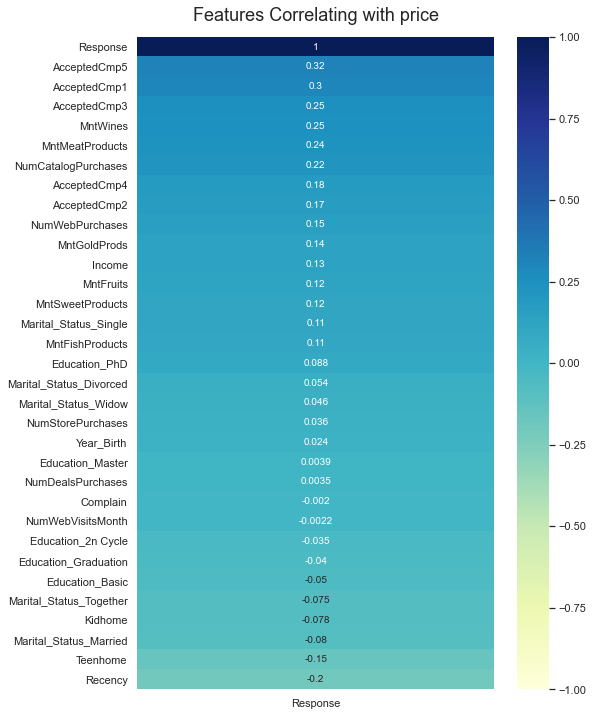

In [202]:
# Correlation for response
corrMatrix = df.corr(method='pearson')
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(corrMatrix[['Response']].sort_values(by='Response', ascending=False), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
heatmap.set_title('Features Correlating with price', fontdict={'fontsize':18}, pad=16);

In [203]:
Counter(df['Response'].values)

Counter({1: 333, 0: 1883})

In [204]:
Counter(df['Response'].values)[1]/Counter(df['Response'].values)[0]

0.17684545937334042

# Vendo os Clusters

In [205]:
X1 = df.drop(['Response', 'Dt_Customer'], axis=1).values
X1

array([[1.9570e+03, 5.8138e+04, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9540e+03, 4.6344e+04, 1.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9650e+03, 7.1613e+04, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [1.9810e+03, 5.6981e+04, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9560e+03, 6.9245e+04, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.9540e+03, 5.2869e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


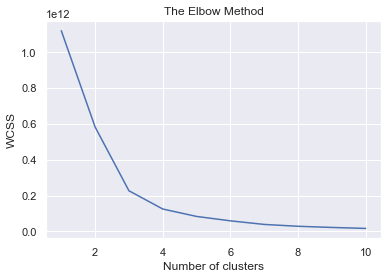

In [206]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [207]:
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(X_train)

In [209]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X_train)
X_embedded

array([[ 33.044495 ,   6.155573 ],
       [ 55.00076  , -10.826507 ],
       [ -3.6250508, -26.072668 ],
       ...,
       [-42.319897 ,  -3.6108782],
       [ -9.053231 ,  13.453147 ],
       [ 56.98541  ,  -5.3906555]], dtype=float32)

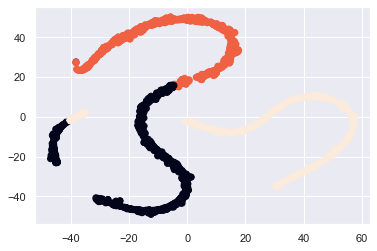

In [210]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], c = kmeans.labels_)

# Dividindo o Dataset

In [211]:
X = df.drop(['Response', 'Dt_Customer'], axis=1)
y = df['Response']

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [213]:
sc = StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)

array([[ 0.3459454 , -0.63855783,  1.0204385 , ..., -0.51556135,
        -0.60190953, -0.19352825],
       [-1.60192748,  0.27095314, -0.82702206, ..., -0.51556135,
        -0.60190953, -0.19352825],
       [ 1.70098742, -1.34656754,  1.0204385 , ..., -0.51556135,
        -0.60190953, -0.19352825],
       ...,
       [-1.00909661, -0.42364627,  1.0204385 , ..., -0.51556135,
        -0.60190953, -0.19352825],
       [-0.50095585, -1.44556481, -0.82702206, ..., -0.51556135,
         1.66137924, -0.19352825],
       [ 0.76939603, -1.14279269,  1.0204385 , ..., -0.51556135,
         1.66137924, -0.19352825]])

In [214]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [215]:
metrics.accuracy_score(y_test, y_pred)

0.871841155234657

In [216]:
metrics.confusion_matrix(y_test, y_pred)

array([[462,   9],
       [ 62,  21]], dtype=int64)

In [217]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [218]:
rfc = RandomForestClassifier(n_estimators=50, random_state=42)
rfc.fit(X_ros, y_ros)
y_pred = rfc.predict(X_test)

In [219]:
metrics.accuracy_score(y_test, y_pred)

0.8754512635379061

In [220]:
metrics.confusion_matrix(y_test, y_pred)

array([[456,  15],
       [ 54,  29]], dtype=int64)

In [222]:
from imblearn.combine import SMOTEENN
smtnn = SMOTEENN(random_state=42)
X_smtnn, y_smtnn = smtnn.fit_resample(X_train, y_train)

In [224]:
rfc = RandomForestClassifier(n_estimators=50, random_state=42)
rfc.fit(X_smtnn, y_smtnn)
y_pred = rfc.predict(X_test)

In [225]:
metrics.accuracy_score(y_test, y_pred)

0.8249097472924187

In [226]:
metrics.confusion_matrix(y_test, y_pred)

array([[410,  61],
       [ 36,  47]], dtype=int64)